# Iris Data Set
### Beginner Level

### Problem: Predict the class of the flower based on available attributes.

##### Import Initial Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('magma')

##### Import Dataset

In [2]:
original_data = pd.read_csv('irisdata.csv')
original_data.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### Dataset Descriptive Statistics

In [4]:
descriptive_stats = original_data.describe()
descriptive_stats

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


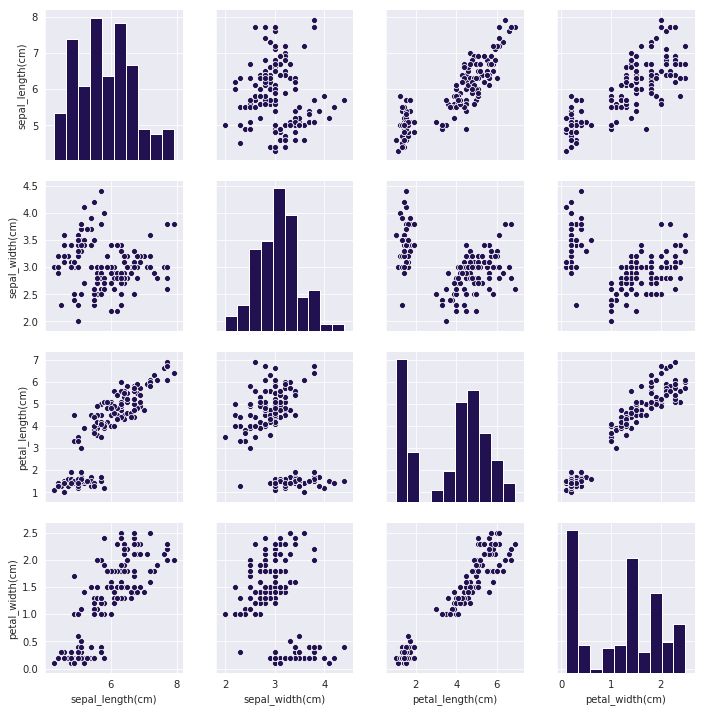

In [5]:
sns.pairplot(original_data)

There may be a correlation between:  
    - petal length - petal width  
    - petal length - sepal length

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

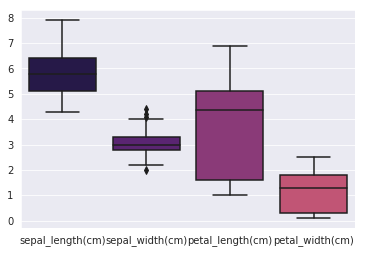

In [6]:
sns.boxplot(data=original_data)
plt.tight_layout

Find sepal_width outliars

In [7]:
descriptive_stats

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
IQR_sw = descriptive_stats['sepal_width(cm)']['75%'] - descriptive_stats['sepal_width(cm)']['25%']
print(IQR_sw)

0.5


In [9]:
#identify outliers
outliers = original_data[(original_data['sepal_width(cm)'] > descriptive_stats['sepal_width(cm)']['mean'] + IQR_sw * 1.5) 
              | (original_data['sepal_width(cm)'] < descriptive_stats['sepal_width(cm)']['mean'] - IQR_sw * 1.5)]


In [10]:
columns = original_data.columns
columns

Index(['sepal_length(cm)', 'sepal_width(cm)', 'petal_length(cm)',
       'petal_width(cm)', 'class'],
      dtype='object')

In [11]:
#outliers function
def outliers(df):
    
    #set parameters
    descriptive_stats = df.describe()
    columns = df.select_dtypes(include=(['float'] or ['numeric'] or ['complex'])).columns
    total_outlier_df = pd.DataFrame(columns = columns)
    
    #add all possible outliers to df
    for x in range(len(columns)):
        new_outlier_df = df[(df[columns[x]] > descriptive_stats[columns[x]]['mean'] + ((descriptive_stats[columns[x]]['75%'] - descriptive_stats[columns[x]]['25%']) * 1.5)) 
           | (df[columns[x]] < descriptive_stats[columns[x]]['mean'] - ((descriptive_stats[columns[x]]['75%'] - descriptive_stats[columns[x]]['25%']) * 1.5))]
        
        total_outlier_df = pd.concat([total_outlier_df, new_outlier_df])
        
    return total_outlier_df
    

In [12]:
test = outliers(original_data)
test

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,class,petal_length(cm),petal_width(cm),sepal_length(cm),sepal_width(cm)
131,Iris-virginica,6.4,2.0,7.9,3.8
5,Iris-setosa,1.7,0.4,5.4,3.9
14,Iris-setosa,1.2,0.2,5.8,4.0
15,Iris-setosa,1.5,0.4,5.7,4.4
16,Iris-setosa,1.3,0.4,5.4,3.9
32,Iris-setosa,1.5,0.1,5.2,4.1
33,Iris-setosa,1.4,0.2,5.5,4.2
41,Iris-setosa,1.3,0.3,4.5,2.3
53,Iris-versicolor,4.0,1.3,5.5,2.3
60,Iris-versicolor,3.5,1.0,5.0,2.0


In [24]:
(test['sepal_width(cm)'] - original_data['sepal_width(cm)'].mean()).abs()

131    0.746
5      0.846
14     0.946
15     1.346
16     0.846
32     1.046
33     1.146
41     0.754
53     0.754
60     1.054
62     0.854
68     0.854
87     0.754
93     0.754
119    0.854
Name: sepal_width(cm), dtype: float64

Although these are outliers in the sepal_width data set, the full data_set does not support that these are true outliers.

Explore Variable Relationships

How correlated are sepal length and petal length?
How correlated are sepal length and sepal width?

##### Correlation Matrix for HeatMap

In [13]:
orig_corr = original_data.corr()
orig_corr

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
sepal_length(cm),1.000000,-0.109369,0.871754,0.817954
sepal_width(cm),-0.109369,1.000000,-0.420516,-0.356544
petal_length(cm),0.871754,-0.420516,1.000000,0.962757
petal_width(cm),0.817954,-0.356544,0.962757,1.000000


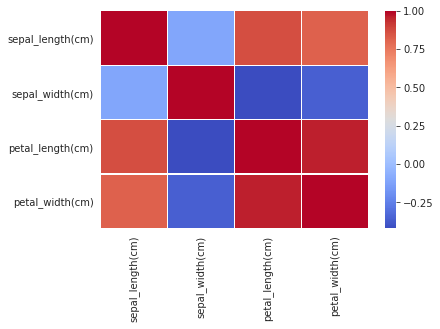

In [14]:
sns.heatmap(orig_corr, cmap = 'coolwarm', linewidth = .2)

Sepal Width does not have any correlation the other numeric columns.  
Petal Length, Petal Width, and Sepal Lengths are very correlated. 

Text(0.5, 1.0, 'petal_legnth(cm) VS petal_width(cm)')

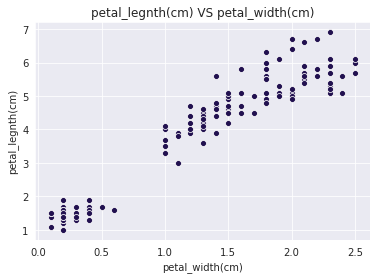

In [15]:
sns.scatterplot(data = original_data, x = 'petal_width(cm)', y = 'petal_length(cm)')
plt.xlabel('petal_width(cm)')
plt.ylabel('petal_legnth(cm)')
plt.title('petal_legnth(cm) VS petal_width(cm)')

Text(0.5, 1.0, 'petal_legnth(cm) VS sepal_width(cm)')

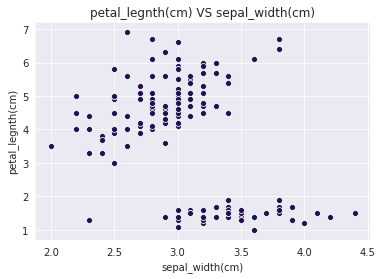

In [16]:
sns.scatterplot(data = original_data, x = 'sepal_width(cm)', y = 'petal_length(cm)')
plt.xlabel('sepal_width(cm)')
plt.ylabel('petal_legnth(cm)')
plt.title('petal_legnth(cm) VS sepal_width(cm)')

##### ANOVA Analysis

#### Logistical Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
#split the data
def LogRegression(X, y):
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=101)
    
    #create and fit model
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    
    #predict
    predictions = lg.predict(X_test)
    
    #evaluate predicitons
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

##### Hypotheses
**Null Hypothesis:** The length of the petals and sepals can not be used to classify its species.   
**Alternate Hypothesis:** The length of the petal and sepals can be used to classify its species. 

In [105]:
LogRegression(original_data.drop(columns=['class']), original_data['class'])

[[15  0  0]
 [ 0 20  2]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        22
 Iris-virginica       0.87      1.00      0.93        13

      micro avg       0.96      0.96      0.96        50
      macro avg       0.96      0.97      0.96        50
   weighted avg       0.97      0.96      0.96        50



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


**Null Hypothesis:** The length of the sepals is needed to classify its species accurately.   
**Alternate Hypothesis:** The length of the sepals is not needed to classify its species accurately. 

In [107]:
LogRegression(original_data.drop(columns=['class', 'sepal_length(cm)' ]), original_data['class'])

[[15  0  0]
 [ 0 16  6]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.73      0.84        22
 Iris-virginica       0.68      1.00      0.81        13

      micro avg       0.88      0.88      0.88        50
      macro avg       0.89      0.91      0.88        50
   weighted avg       0.92      0.88      0.88        50



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


**Null Hypothesis:** The width of the sepals is needed to classify its species accurately.   
**Alternate Hypothesis:** The width of the sepals is not needed to classify its species accurately. 

In [106]:
LogRegression(original_data.drop(columns=['class', 'sepal_width(cm)']), original_data['class'])

[[15  0  0]
 [ 0 18  4]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.82      0.90        22
 Iris-virginica       0.76      1.00      0.87        13

      micro avg       0.92      0.92      0.92        50
      macro avg       0.92      0.94      0.92        50
   weighted avg       0.94      0.92      0.92        50



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
